In [1]:
! pip install cryptory

  Running setup.py bdist_wheel for cryptory: started
  Running setup.py bdist_wheel for cryptory: finished with status 'done'
  Stored in directory: C:\Users\Sowmya Nallapaneni\AppData\Local\pip\Cache\wheels\ec\b4\6f\6ae72a8dc1ca028c78d88b90381b34166b2b6d61c99349bf4c
Successfully built cryptory


In [2]:
#Import the libraries
import os
import re
import csv
import time
import pandas as pd
from random import randint

In [32]:
# load package
from cryptory import Cryptory

# initialise object 
# pull data from start of 2017 to present day
my_cryptory = Cryptory(from_date = "2017-01-01", to_date = "2019-01-01")


# get historical bitcoin prices from coinmarketcap
my_cryptory.extract_coinmarketcap("bitcoin")

,date,open,high,low,close,volume,marketcap
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990,67098634181
1,2018-12-31,3866.84,3868.74,3725.87,3742.70,4661840806,65331499158
2,2018-12-30,3822.38,3901.91,3797.22,3865.95,4770578575,67475512827
3,2018-12-29,3932.49,3963.76,3820.41,3820.41,4991655917,66672244158
4,2018-12-28,3653.13,3956.14,3642.63,3923.92,5631554348,68471837969
5,2018-12-27,3854.69,3874.42,3645.45,3654.83,5130222366,63768757101
6,2018-12-26,3819.67,3893.36,3769.86,3857.30,5326547918,67292819465
7,2018-12-25,4081.03,4089.56,3760.02,3815.49,6158207293,66556033172
8,2018-12-24,4000.33,4271.79,4000.33,4078.60,7240968501,71137548589
9,2018-12-23,4020.99,4085.72,3976.41,3998.98,6151275490,69741217417


In [ ]:
# get daily subscriber numbers to the bitcoin reddit page
my_cryptory.extract_reddit_metrics(subreddit="bitcoin",
                                    metric="total-subscribers")

In [29]:
# google trends- bitcoin search results
google_trend = my_cryptory.get_google_trends(kw_list=names_list)

ValueError: The keyword list can contain at most 5 words

In [41]:
google_data_list = []
for name in names_list:
    data = my_cryptory.get_google_trends(kw_list=[name])
    google_data_list.append(data.iloc[:,1])

KeyError: 'date'

In [40]:
google_trend.iloc[:,1]

0      5.003728
1      5.128821
2      5.128821
3      5.629194
4      6.129567
5      6.254660
6      6.129567
7      6.379753
8      6.755033
9      5.879380
10     5.879380
11     7.130312
12     7.880871
13     7.630685
14     7.005219
15     7.130312
16     5.879380
17     6.379753
18     7.130312
19     6.504846
20     6.254660
21     6.629940
22     7.005219
23     6.379753
24     6.880126
25     9.256897
26     7.255405
27     6.504846
28     6.880126
29     6.880126
         ...   
701    2.307075
702    2.244721
703    2.369428
704    2.369428
705    2.494135
706    2.618842
707    2.618842
708    2.556488
709    2.431782
710    2.494135
711    2.494135
712    2.618842
713    2.868255
714    2.930609
715    2.618842
716    2.618842
717    2.930609
718    3.242375
719    3.865909
720    3.616496
721    3.055315
722    3.491789
723    3.678849
724    4.052969
725    4.863563
726    5.611804
727    4.801210
728    4.052969
729    4.302383
730    2.556488
Name: bitcoin, Length: 7

        date   bitcoin  ethereum
0 2019-01-01  5.003728  0.500373
1 2018-12-31  5.128821  0.500373
2 2018-12-30  5.128821  0.500373
3 2018-12-29  5.629194  0.500373
4 2018-12-28  6.129567  0.500373


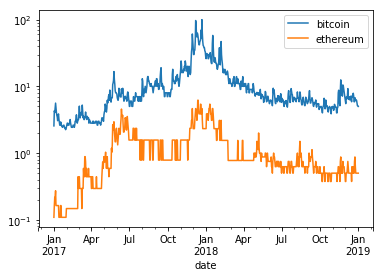

In [25]:
import matplotlib.pyplot as plt

print(google_trend.head())

google_trend.plot(x= 'date', y=['bitcoin','ethereum'])
plt.yscale('log')

In [4]:
help(Cryptory)

Help on class Cryptory in module cryptory.cryptory:

class Cryptory(builtins.object)
 |  Cryptory(from_date, to_date=None, ascending=False, fillgaps=True, timeout=10.0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, from_date, to_date=None, ascending=False, fillgaps=True, timeout=10.0)
 |      Initialise cryptory class
 |      
 |      Parameters
 |      ----------
 |      from_date : the starting date (as string) for the returned data;
 |          required format is %Y-%m-%d (e.g. "2017-06-21")
 |      to_date : the end date (as string) for the returned data;
 |          required format is %Y-%m-%d (e.g. "2017-06-21")
 |          Optional. If unspecified, it will default to the current day
 |      to_date : binary. Determines whether the returned dataframes are
 |          ordered by date in ascending or descending order 
 |          (defaults to False i.e. most recent first)
 |      fillgaps : binary. When data does not exist (e.g. weekends for stocks)
 |          should the 

In [ ]:
# generate price correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "bch", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")

In [17]:
import pandas as pd

names = pd.read_csv('Crypto_names.csv')

In [27]:
names.head()

,name,symbol,slug
0,0x,ZRX,0x
1,Aeternity,AE,aeternity
2,Aion,AION,aion
3,Ardor,ARDR,ardor
4,Ark,ARK,ark


In [28]:
names_list = list(names.loc[:,'name'])
names_list[:5]

['0x', 'Aeternity', 'Aion', 'Ardor', 'Ark']